# Assignment # 5: Netflow Packet Analysis

In [19]:
# Necessary imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

In [20]:
# Read network data into dataframe
network_data = pd.read_csv('Netflow_dataset.csv')

## a) Average Packet sizes

In [21]:
# a. Average size of the packets across all the traffic captured in the dataset
num_packets = network_data['dpkts'].sum()
num_bytes = network_data['doctets'].sum()
avg_packet_size = num_bytes/num_packets

print("Average Packet size:", avg_packet_size)

Average Packet size: 768.1808601148954


## b) Complementary Cumulative Probability Distribution (CCDF)

In [22]:
# Calculate flow durations
network_data['duration'] = network_data['last'] - network_data['first']

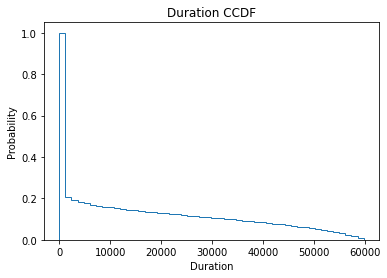

In [23]:
# Plot CCDF of durations
plt.hist(network_data['duration'], bins=50, density=True, histtype='step', cumulative=-1)

# Set labels
plt.xlabel('Duration')
plt.ylabel('Probability')
plt.title('Duration CCDF')
plt.show()

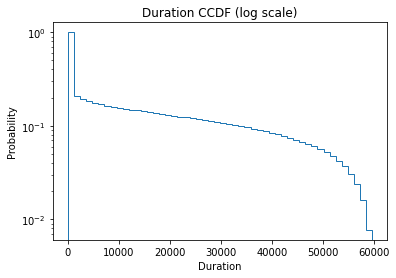

In [24]:
# Plot CCDF of durations with log scale
plt.hist(network_data['duration'], bins=50, density=True, histtype='step', cumulative=-1, log=True)

# Set labels
plt.xlabel('Duration')
plt.ylabel('Probability')
plt.title('Duration CCDF (log scale)')
plt.show()

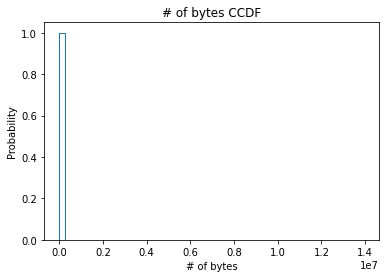

In [25]:
# Plot CCDF of durations with log scale
plt.hist(network_data['doctets'], bins=50, density=True, histtype='step', cumulative=-1)

# Set labels
plt.xlabel('# of bytes')
plt.ylabel('Probability')
plt.title('# of bytes CCDF')
plt.show()

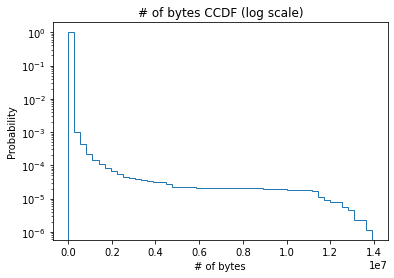

In [26]:
# Plot CCDF of durations with log scale
plt.hist(network_data['doctets'], bins=50, density=True, histtype='step', cumulative=-1, log=True)

# Set labels
plt.xlabel('# of bytes')
plt.ylabel('Probability')
plt.title('# of bytes CCDF (log scale)')
plt.show()

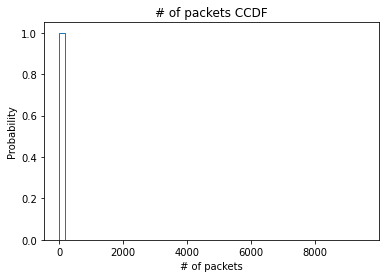

In [27]:
# Plot CCDF of durations with log scale
plt.hist(network_data['dpkts'], bins=50, density=True, histtype='step', cumulative=-1)

# Set labels
plt.xlabel('# of packets')
plt.ylabel('Probability')
plt.title('# of packets CCDF')
plt.show()

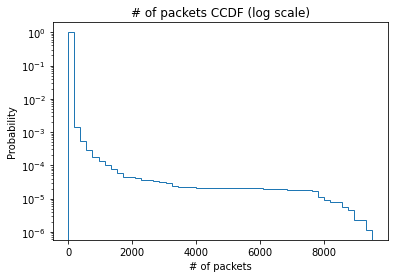

In [28]:
# Plot CCDF of durations with log scale
plt.hist(network_data['dpkts'], bins=50, density=True, histtype='step', cumulative=-1, log=True)

# Set labels
plt.xlabel('# of packets')
plt.ylabel('Probability')
plt.title('# of packets CCDF (log scale)')
plt.show()

## c) Kind of traffic flowing through router

In [29]:
# We only need these 2 colums
sender_traffic = network_data[['srcport', 'doctets']]

# Create table of port frequencies
src_port_frequency = sender_traffic['srcport'].value_counts().head(10).to_frame(name='frequency')

# Create table of port usage in bytes
src_port_bytes = sender_traffic.groupby(['srcport']).sum()

# Add percentage column to port usage by byte
src_port_bytes['doctets_perc'] = (src_port_bytes['doctets'] / src_port_bytes['doctets'].sum()) * 100

# Merge tables
src_port_frequency.merge(src_port_bytes, left_index=True, right_on='srcport')

,frequency,doctets,doctets_perc
srcport,,,
80,175177,1309585549,43.939229
443,19605,51432480,1.725663
53,12927,3818908,0.128132
0,9176,18939605,0.635462
25,5698,724126,0.024296
22,5408,64623818,2.168259
1935,4285,109209645,3.664203
3074,3884,2484545,0.083361
3389,3202,2571438,0.086277


In [30]:
# We only need these 2 colums
receiver_traffic = network_data[['dstport', 'doctets']]

# Create table of port frequencies
dst_port_frequency = receiver_traffic['dstport'].value_counts().head(10).to_frame(name='frequency')

# Create table of port usage in bytes
dst_port_bytes = receiver_traffic.groupby(['dstport']).sum()

# Add percentage column to port usage by byte
dst_port_bytes['doctets_perc'] = (dst_port_bytes['doctets'] / dst_port_bytes['doctets'].sum()) * 100

# Merge tables
dst_port_frequency.merge(dst_port_bytes, left_index=True, right_on='dstport')

,frequency,doctets,doctets_perc
dstport,,,
80,319929,87250983,2.927446
443,34727,23074506,0.774196
53,17006,1454716,0.048809
445,11620,580671,0.019483
25,8902,10467674,0.351212
123,8378,809319,0.027154
1935,7933,5034241,0.168909
3074,6565,3157339,0.105935
2048,3410,474147,0.015909


## d) Traffic volumes based on source IP prefix

In [31]:
def top_percents(src_addr_volume):
    dec_perc = 0.001
    for dec_perc in [0.001, 0.01, 0.1]:
        percentage = src_addr_volume.iloc[int(len(src_addr_volume) * dec_perc)]['doctets_cumperc']
        print("Top", dec_perc * 100, "\b% of IP addresses:", percentage, "\b% of all bytes")
        dec_perc *= 10

In [32]:
# Get source IP addresses bytes used by each
src_addr_volume = network_data[['srcaddr', 'doctets']].groupby('srcaddr').sum().sort_values(by='doctets', ascending=False)

# Add percentage of total bytes that each IP address uses
src_addr_volume['doctets_perc'] = (src_addr_volume['doctets'] / src_addr_volume['doctets'].sum()) * 100

# A cummulative percentage column
src_addr_volume['doctets_cumperc'] = src_addr_volume['doctets_perc'].cumsum()

# Get byte percentage by top 0.1%, 1%, and 10% of IP addresses
top_percents(src_addr_volume)

Top 0.1% of IP addresses: 59.197523472627296% of all bytes
Top 1.0% of IP addresses: 82.28337412034935% of all bytes
Top 10.0% of IP addresses: 98.38374183660346% of all bytes


In [33]:
# Get byte volume by source mask
src_mask_volume = network_data[['src_mask', 'doctets']].groupby('src_mask').sum().sort_index()

# Add percentage of whole bytes for each mask
src_mask_volume['doctets_perc'] = (src_mask_volume['doctets'] / src_mask_volume['doctets'].sum()) * 100

# Get the 0 mask entry
mask_length_zero_perc = src_mask_volume.query('src_mask == 0')['doctets_perc'][0]

# Print the percentage
print("Percentage of traffic with source mask of 0:", mask_length_zero_perc, "\b%")

Percentage of traffic with source mask of 0: 43.25989606316304%


In [34]:
# Get source IP addresses bytes used by each, but exclude 0 src_mask
src_addr_volume = network_data[['srcaddr', 'doctets', 'src_mask']].query('src_mask != 0').groupby('srcaddr').sum().sort_values(by='doctets', ascending=False)

# Add percentage of total bytes that each IP address uses
src_addr_volume['doctets_perc'] = (src_addr_volume['doctets'] / src_addr_volume['doctets'].sum()) * 100

# A cummulative percentage column
src_addr_volume['doctets_cumperc'] = src_addr_volume['doctets_perc'].cumsum()

# Get byte percentage by top 0.1%, 1%, and 10% of IP addresses
print("Excluding 0 source masks...")
top_percents(src_addr_volume)

Excluding 0 source masks...
Top 0.1% of IP addresses: 38.312654570030915% of all bytes
Top 1.0% of IP addresses: 64.9107590156638% of all bytes
Top 10.0% of IP addresses: 95.92718805374952% of all bytes


## e) Institution with 128.112.0.0/16 address block

In [35]:
# Grab source addresses, # of packets, and # of bytes
inst_data = network_data[['srcaddr', 'dpkts', 'doctets']]

# True if source address is in address block 128.112
inst_data['from_institution'] = inst_data['srcaddr'].str.startswith('128.112')

# Find # of packets and # of bytes sent by in and out of institution 
inst_data = inst_data.groupby('from_institution').sum()

inst_data['dpkts_perc'] = (inst_data['dpkts'] / inst_data['dpkts'].sum()) * 100

inst_data['doctets_perc'] = (inst_data['doctets'] / inst_data['doctets'].sum()) * 100

print('Traffic sent from institution...')
inst_data

Traffic sent from institution...


,dpkts,doctets,dpkts_perc,doctets_perc
from_institution,,,,
False,3840525,2959556572,98.985741,99.299076
True,39352,20890679,1.014259,0.700924


In [36]:
# Grab source addresses, # of packets, and # of bytes
inst_data = network_data[['dstaddr', 'dpkts', 'doctets']]

# True if source address is in address block 128.112
inst_data['to_institution'] = inst_data['dstaddr'].str.startswith('128.112')

# Find # of packets and # of bytes sent by in and out of institution 
inst_data = inst_data.groupby('to_institution').sum()

inst_data['dpkts_perc'] = (inst_data['dpkts'] / inst_data['dpkts'].sum()) * 100

inst_data['doctets_perc'] = (inst_data['doctets'] / inst_data['doctets'].sum()) * 100

print('Traffic Sent to institution...')
inst_data

Traffic Sent to institution...


,dpkts,doctets,dpkts_perc,doctets_perc
to_institution,,,,
False,3822903,2915128992,98.531551,97.808441
True,56974,65318259,1.468449,2.191559
